In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Score_cluster
import Score_physics
from Plotting import *

from scipy.optimize import curve_fit

In [5]:
df = pd.read_csv("result_truth_200.csv")

In [18]:
ievent = 1
iparticle=1001
itrack = 1000

df_event=df.loc[df['event']==ievent]
df_particle=df_event[df['particle']==iparticle]
df_track=df_event[df['track']==itrack]

In [19]:
df_event

,Unnamed: 0,event,particle,track,hit,x,y
100,100,1,1000,1000,40,-6.448173,3.292107
101,101,1,1000,1000,60,-9.797012,4.701742
102,102,1,1000,1000,80,-13.173406,6.044136
103,103,1,1000,1000,100,-16.576005,7.318752
104,104,1,1000,1000,120,-20.003448,8.525076
105,105,1,1000,1000,140,-23.454365,9.662627
106,106,1,1000,1000,160,-26.927377,10.730947
107,107,1,1000,1000,180,-30.421093,11.729608
108,108,1,1000,1000,200,-33.934118,12.658209
109,109,1,1000,1000,220,-37.465047,13.516377


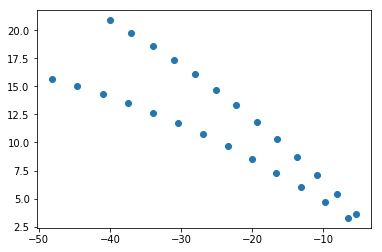

In [20]:
x=df_track['x'].values
y=df_track['y'].values

plt.scatter(x,y)
plt.show()

In [21]:
x,y

(array([ -6.44817293,  -9.79701213, -13.17340616, -16.57600505,
        -20.0034483 , -23.45436549, -26.92737673, -30.4210933 ,
        -33.93411817, -37.46504654, -41.01246642, -44.57495923,
        -48.15110029,  -5.37711509,  -8.09718463, -10.85173555,
        -13.63966676, -16.45986377, -19.31119918, -22.19253311,
        -25.10271364, -28.04057731, -31.00494956, -33.99464519,
        -37.00846887, -40.04521556]),
 array([  3.29210717,   4.7017422 ,   6.04413644,   7.3187516 ,
          8.52507649,   9.66262722,  10.73094742,  11.72960838,
         12.65820924,  13.51637719,  14.30376754,  15.02006394,
         15.66497845,   3.63130702,   5.38131615,   7.0765945 ,
          8.71646287,  10.30026424,  11.82736396,  13.29715008,
         14.70903356,  16.06244849,  17.35685236,  18.59172623,
         19.76657497,  20.88092747]))

In [22]:
def rotateToQuadrant(x,y):
    seedx=x[1]-x[0]
    seedy=y[1]-y[0]
    phi0=np.arctan2(y[0],x[0])
    phi1=np.arctan2(seedy,seedx)
    phi=phi1
    c, s = np.cos(-phi), np.sin(-phi)
    xr=c*x-s*y
    yr=s*x+c*y
    print phi
    return xr,yr

def func(x, r, vx, vy):
    return r - np.sqrt(r**2-(x-vx)**2) + vy

2.74317231101


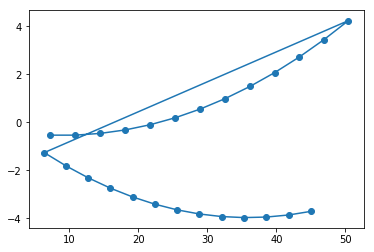

In [23]:
xr,yr=rotateToQuadrant(x,y)
plt.scatter(xr,yr)
plt.plot(xr,yr)
plt.show()

In [24]:
popt, pcov = curve_fit(func, xr, yr, p0=[200.,0.,0.], bounds=([5.,-25.,-25.], [1000., 25, 25]))

In [25]:
popt

array([ 81.57171262,  23.2364982 ,  -2.20323222])

In [26]:
x,y

(array([ -6.44817293,  -9.79701213, -13.17340616, -16.57600505,
        -20.0034483 , -23.45436549, -26.92737673, -30.4210933 ,
        -33.93411817, -37.46504654, -41.01246642, -44.57495923,
        -48.15110029,  -5.37711509,  -8.09718463, -10.85173555,
        -13.63966676, -16.45986377, -19.31119918, -22.19253311,
        -25.10271364, -28.04057731, -31.00494956, -33.99464519,
        -37.00846887, -40.04521556]),
 array([  3.29210717,   4.7017422 ,   6.04413644,   7.3187516 ,
          8.52507649,   9.66262722,  10.73094742,  11.72960838,
         12.65820924,  13.51637719,  14.30376754,  15.02006394,
         15.66497845,   3.63130702,   5.38131615,   7.0765945 ,
          8.71646287,  10.30026424,  11.82736396,  13.29715008,
         14.70903356,  16.06244849,  17.35685236,  18.59172623,
         19.76657497,  20.88092747]))

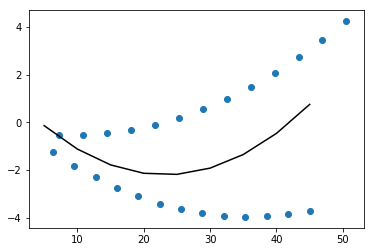

In [27]:
xp=np.arange(5.,50.,5.)
plt.plot(xp,func(xp,popt[0],popt[1],popt[2]),'k')
plt.scatter(xr,yr)
plt.show()

In [28]:
popt

array([ 81.57171262,  23.2364982 ,  -2.20323222])